#Proyecto Final
##Estadística con Python
Se entrega el siguiente set de datos de una empresa del sector de telecomunicaciones,TelcoCustomerChurn.csv, el cual es un dataset que cuenta con las principales características de una empresa del sector de telecomunicaciones respecto a sus campañas, facturación y vínculo con el cliente.

##Esquema metodológico de la fuga de clientes
La empresa en el último mes y debido a la coyuntura del COVID – 19 ha incrementado en + 0.5 pp su ratio de churn de clientes, pasando de 2% en promedio de los últimos 6 meses a 2.5% en los últimos 6 siguientes. Como sabemos el costo de adquisición de un nuevo cliente es aproximadamente 6 a 7 veces mayor que retener uno que ya tenemos. ¿Cómo puede la institución de telecomunicaciones tener una mayor efectividad para identificar a los clientes propensos a la fuga?
Para responder a esto, tenemos que analizar la información de toda la facturación y vínculo que tiene la institución o empresa con los clientes para identificar los patrones que nos ayudarán a encontrar
conclusiones para desarrollar estrategias futuras. La empresa  ecesita saber dimensionar y bajar el
ratio de fuga futuro de los clientes.

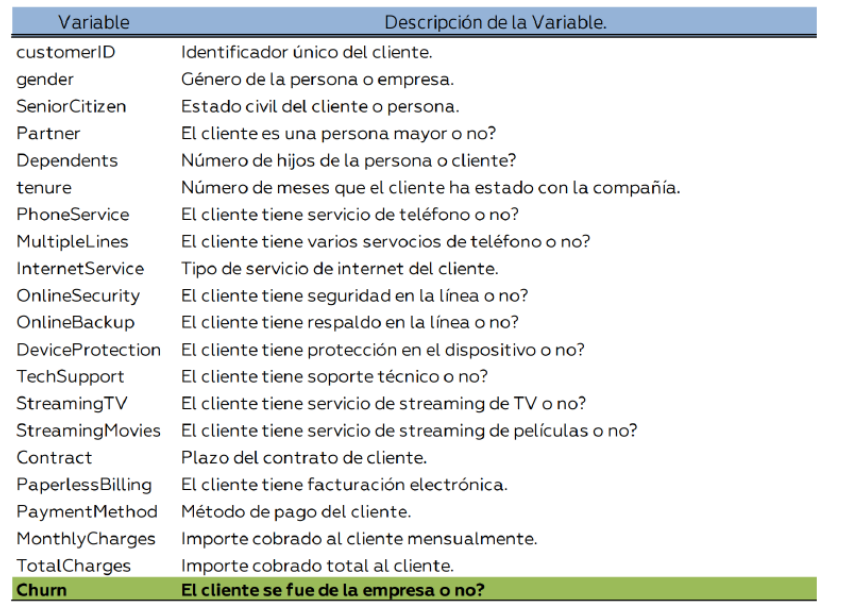

Pregunta 1 Realice un análisis de estadística descriptiva de las variables que incluya gráficos de
acuerdo a la distribución de las variables y a la relación que tienen entre ellas, considerando la
variable Churn como la variable objetivo.

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
import statsmodels.api as sm
import math

# Para un modelo supervisado de ejemplo
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier

## Métricas de los modelos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [189]:
df = pd.read_csv(r'G:\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Universidad Ricardo Palma\ESTADISTICA CON PYTHON\codigo\base de datos\TelcoCustomerChurn.csv')

In [190]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [191]:
df.shape

(7043, 21)

In [192]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [194]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [195]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [196]:
def encontrar_outliers(data,col):
    outliers=[]
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in data[col]:
        if out1>upper_limit or out1<lower_limit:
            outliers.append(out1)
    return np.array(outliers)

def graficos(data,col):
    fix,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.boxplot(y=data[col],ax=ax1)
    ax1.set_ylabel=col
    ax1.set_title('Gráfico de cajas de {}'.format(col))
    sns.histplot(data,x=col,kde=True,ax=ax2)
    ax2.set_title('Distribution plot of {}'.format(col))
    plt.axvline(data[col].mean(),color='red',linestyle='--')
    plt.legend(['densidad','media','distribución'])

def analisis_numerico(data,col):
    print('Cantidad de outlier:',len(encontrar_outliers(data,col)))
    print('Media:',round(data[col].mean(),3))
    print('Mediana:',data[col].median())
    print('Q1:',data[col].quantile(0.25))
    print('Q3:',data[col].quantile(0.75))
    print('max:',data[col].max())
    print('Asimetría:',round(sp.skew(data[col]),3))
    print('Kurtosis:',round(sp.kurtosis(data[col].max()),3))
    graficos(data,col)

def topcorrelaciones(data):
    cormatrix = data.corr()
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    cormatrix.columns = ["Variable 1", "Variable 2", "correlación"]
    cormatrix=cormatrix.query('correlación!=0')
    return cormatrix

def describe_dataframe(df):
        column_descriptions = []

        for column in df.columns:
            #print(column)
            column_info = {}
            column_info['variable'] = column

            # Calcular el porcentaje de valores nulos
            null_percentage = df[column].isnull().mean() * 100
            column_info['nulos'] = round(null_percentage, 2)

            # Determinar el tipo de variable
            unique_values = df[column].nunique()
            total_values = len(df[column])
            if pd.api.types.is_object_dtype(df[column]): #pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_string_dtype(df[column]) or
                column_info['tipo'] = 'Categorical'
                column_info['etiquetas'] = unique_values
            elif pd.api.types.is_numeric_dtype(df[column]):
                if unique_values / total_values < 0.1:
                # if unique_values < 30:
                    column_info['tipo'] = 'Discrete'
                    column_info['etiquetas'] = unique_values
                else:
                    column_info['tipo'] = 'Continuous'
                    column_info['etiquetas'] = 'N/A'  # No aplicable para variables continuas
            else:
                column_info['tipo'] = 'Other'
                column_info['etiquetas'] = 'N/A'  # No aplicable para otras variables

            # Verificar la presencia de outliers (solo para variables numéricas)
            if pd.api.types.is_numeric_dtype(df[column]):
                q1 = df[column].quantile(0.25)
                q3 = df[column].quantile(0.85)
                iqr = q3 - q1
                lower_bound = q1 - 1.5 * iqr
                upper_bound = q3 + 1.5 * iqr
                outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
                column_info['outliers'] = 'Yes' if outliers > 0 else 'No'
            else:
                column_info['outliers'] = 'N/A'  # No aplicable para variables no numéricas

            column_descriptions.append(column_info)

        return pd.DataFrame(column_descriptions)

In [197]:
t_resumen = describe_dataframe(df)
t_resumen

,variable,nulos,tipo,etiquetas,outliers
0,customerID,0.0,Categorical,7043,N/A
1,gender,0.0,Categorical,2,N/A
2,SeniorCitizen,0.0,Discrete,2,No
3,Partner,0.0,Categorical,2,N/A
4,Dependents,0.0,Categorical,2,N/A
5,tenure,0.0,Discrete,73,No
6,PhoneService,0.0,Categorical,2,N/A
7,MultipleLines,0.0,Categorical,3,N/A
8,InternetService,0.0,Categorical,3,N/A
9,OnlineSecurity,0.0,Categorical,3,N/A


Churn
No     5174
Yes    1869
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Churn'>

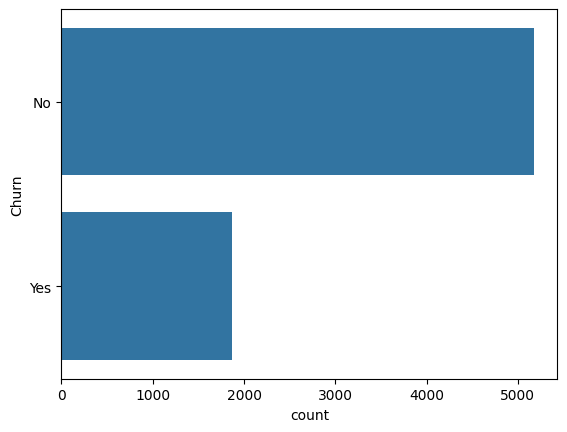

In [198]:
print(df.Churn.value_counts())
sns.countplot(y='Churn', data=df)

La variable objetivo presenta datos desbalanceados

In [199]:
df["Churn"] = (df["Churn"]=="Yes").astype(int)
print(df.Churn.value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [200]:
t_resumen = describe_dataframe(df)
t_resumen

,variable,nulos,tipo,etiquetas,outliers
0,customerID,0.0,Categorical,7043,N/A
1,gender,0.0,Categorical,2,N/A
2,SeniorCitizen,0.0,Discrete,2,No
3,Partner,0.0,Categorical,2,N/A
4,Dependents,0.0,Categorical,2,N/A
5,tenure,0.0,Discrete,73,No
6,PhoneService,0.0,Categorical,2,N/A
7,MultipleLines,0.0,Categorical,3,N/A
8,InternetService,0.0,Categorical,3,N/A
9,OnlineSecurity,0.0,Categorical,3,N/A


In [201]:
l_categorico = t_resumen[t_resumen["tipo"]=="Categorical"].variable.to_list()
l_categorico

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']

In [202]:
#c=3
#r=math.ceil(len(l_categorico)/c)
#fig, ax = plt.subplots(r,c,figsize=(14, 14),constrained_layout=True)
#for i,j in zip(l_categorico,ax.ravel()):
#    axx=sns.countplot(y=i, hue='Churn',data=df,ax=j) #, hue='y'

In [203]:
l_otros = t_resumen[t_resumen["tipo"]!="Categorical"].variable.to_list()
l_otros

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn']

In [204]:
df.groupby("Churn")[l_otros].mean()

,SeniorCitizen,tenure,MonthlyCharges,Churn
Churn,,,,
0,0.128721,37.569965,61.265124,0.0
1,0.254682,17.979133,74.441332,1.0


Text(0, 0.5, 'Frecuencia de fuga')

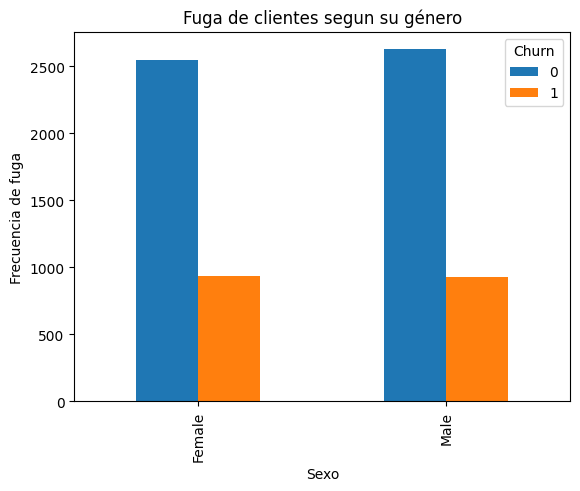

In [205]:
%matplotlib inline
pd.crosstab(df.gender, df.Churn).plot(kind="bar")
plt.title("Fuga de clientes segun su género")
plt.xlabel("Sexo")
plt.ylabel("Frecuencia de fuga")

Text(0, 0.5, 'Frecuencia de fuga')

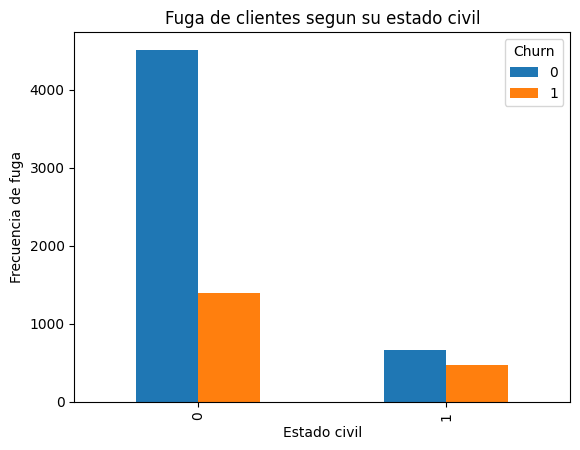

In [206]:
%matplotlib inline
pd.crosstab(df.SeniorCitizen, df.Churn).plot(kind="bar")
plt.title("Fuga de clientes segun su estado civil")
plt.xlabel("Estado civil")
plt.ylabel("Frecuencia de fuga")

Text(0, 0.5, 'Frecuencia de fuga')

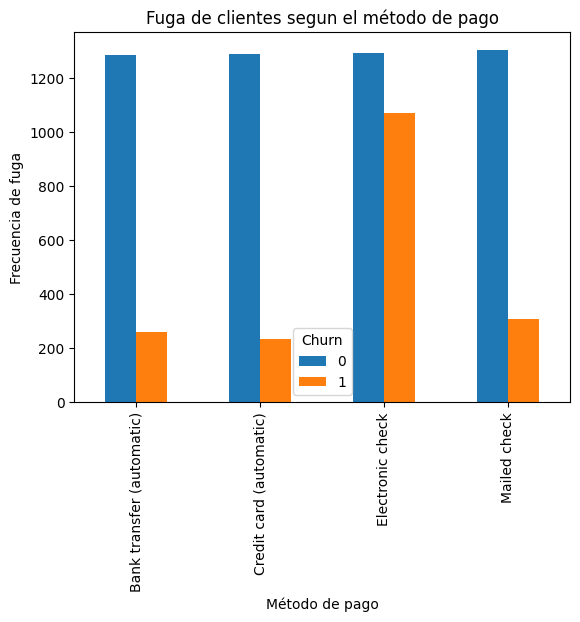

In [207]:
%matplotlib inline
pd.crosstab(df.PaymentMethod , df.Churn).plot(kind="bar")
plt.title("Fuga de clientes segun el método de pago")
plt.xlabel("Método de pago")
plt.ylabel("Frecuencia de fuga")

Text(0, 0.5, 'Frecuencia de fuga')

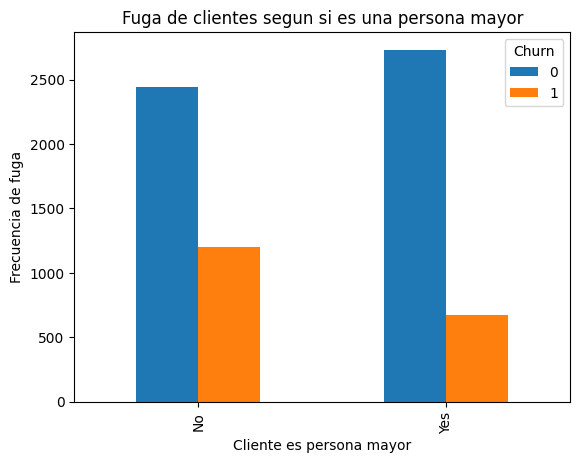

In [208]:
%matplotlib inline
pd.crosstab(df.Partner , df.Churn).plot(kind="bar")
plt.title("Fuga de clientes segun si es una persona mayor")
plt.xlabel("Cliente es persona mayor")
plt.ylabel("Frecuencia de fuga")

Cantidad de outlier: 0
Media: 32.371
Mediana: 29.0
Q1: 9.0
Q3: 55.0
max: 72
Asimetría: 0.239
Kurtosis: nan


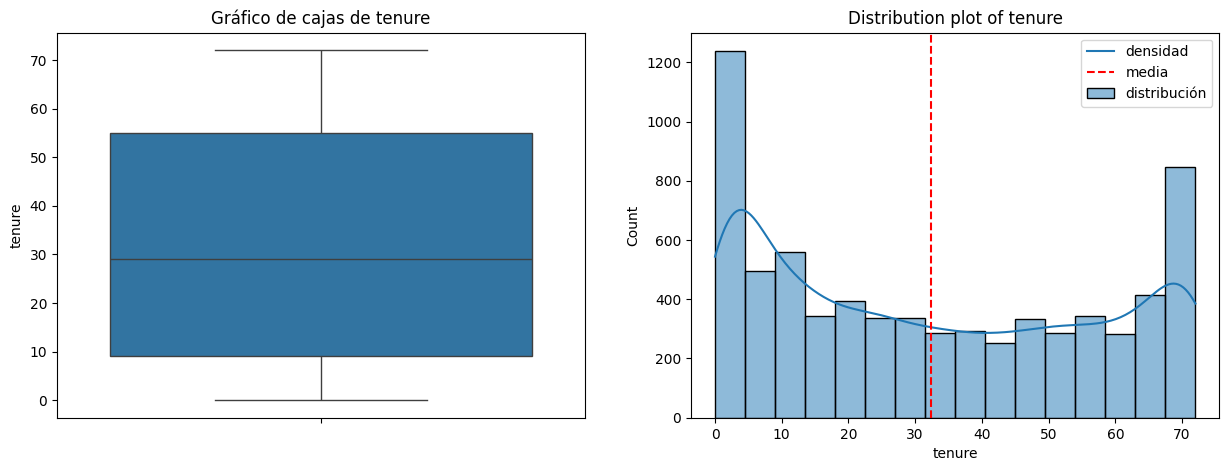

In [209]:
analisis_numerico(df,'tenure')

Text(0, 0.5, 'Cliente')

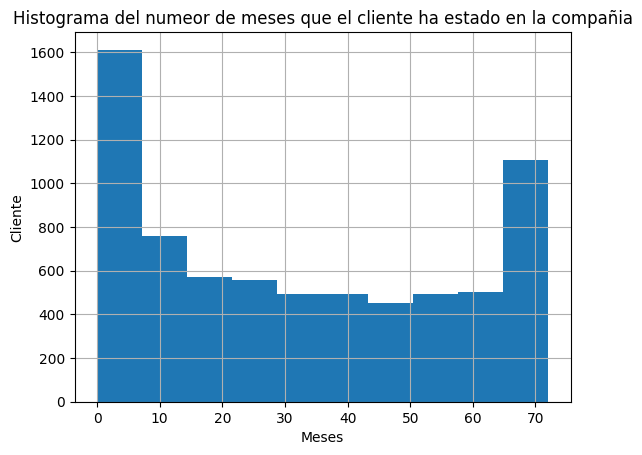

In [210]:
%matplotlib inline
df.tenure.hist()
plt.title("Histograma del numeor de meses que el cliente ha estado en la compañia")
plt.xlabel("Meses")
plt.ylabel("Cliente")

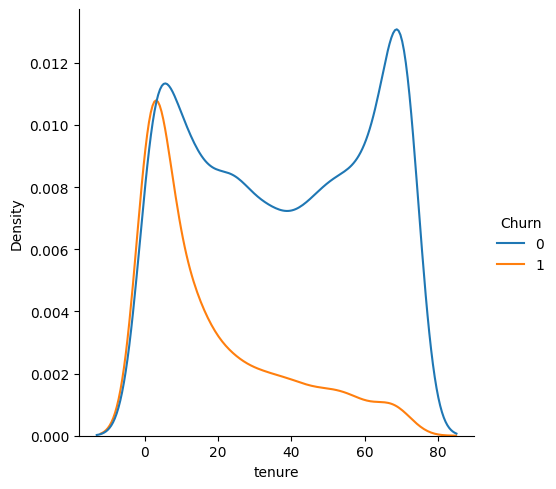

In [211]:
sns.displot(df, x="tenure", hue="Churn", kind="kde")

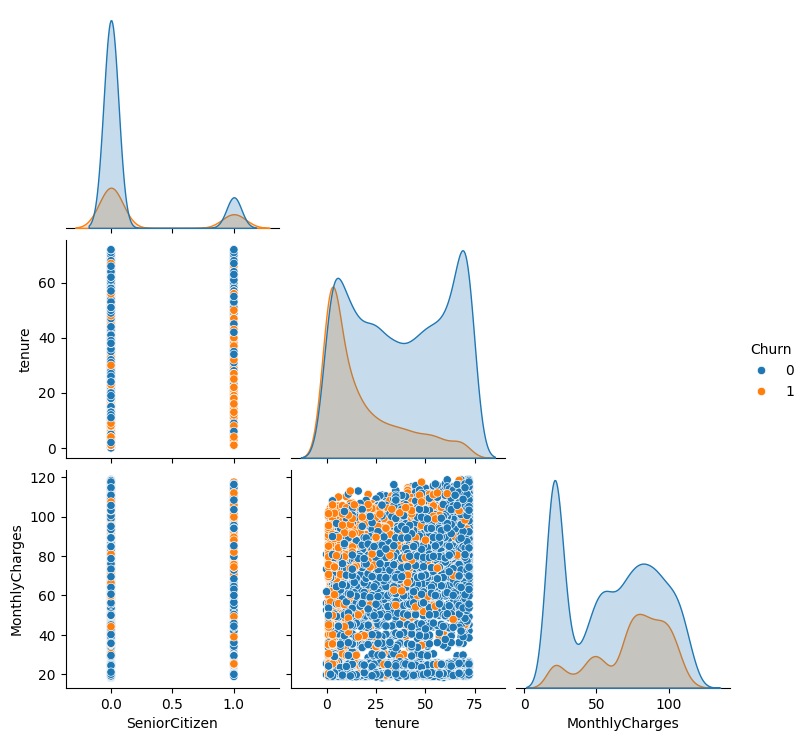

In [212]:
sns.pairplot(df[l_otros], hue="Churn", diag_kind="kde",  corner=True)

<Axes: >

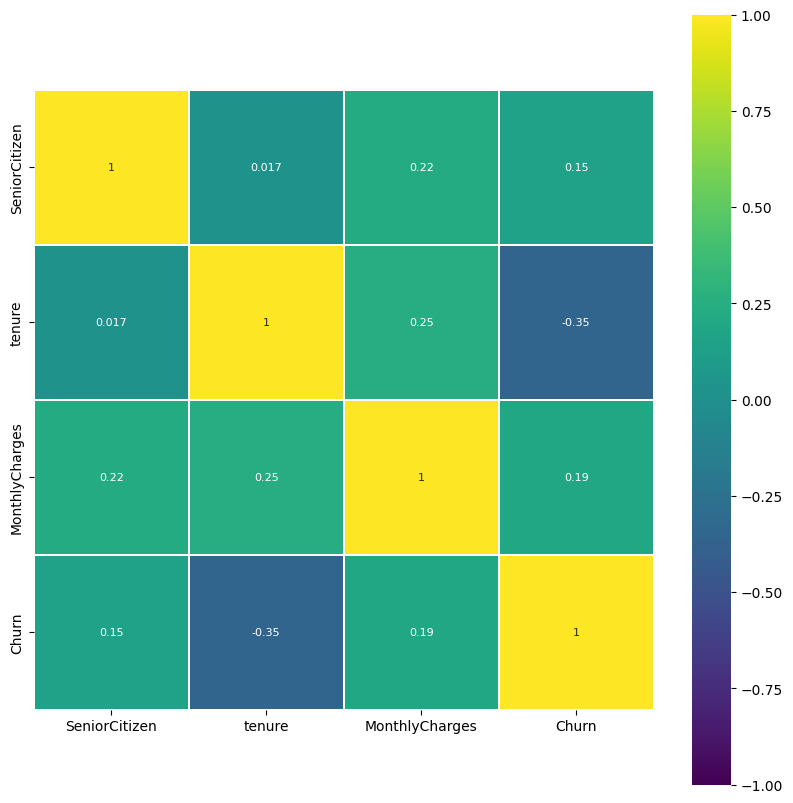

In [213]:
corr = df[l_otros].corr() # We already examined SalePrice correlations
plt.figure(figsize=(10, 10))
k = 0.1
#sns.heatmap(corr[(corr >= k) | (corr <= -k)], #solo considera las correlaciones mayores a k (0.5)
sns.heatmap(corr,
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

In [214]:
df.shape

(7043, 21)

## Aplicando Encoding a las variables categoricas, con la finalidad de transformarlas en una representación númerica

In [215]:


def apply_target_encoding_mean(df, cat_column, target_column):
    """
    Aplica Target Encoding (usando la media) a una columna categórica en un DataFrame.

    Parameters:
    df (pd.DataFrame): El DataFrame que contiene los datos.
    cat_column (str): El nombre de la columna categórica a codificar.
    target_column (str): El nombre de la columna objetivo.

    Returns:
    pd.DataFrame: El DataFrame con la columna categórica codificada.
    """
    mean_encoded = df.groupby(cat_column)[target_column].mean()
    df[cat_column + '_encoded'] = df[cat_column].map(mean_encoded)
    return df

In [216]:
categories = ['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']

In [217]:
for category in categories:
  apply_target_encoding_mean(df, category, 'Churn')

In [218]:
df.drop(categories, axis=1, inplace=True) #eliminar la columna categoricas originales

In [219]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,customerID_encoded,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded,TotalCharges_encoded
0,0,1,29.85,0,0.0,0.269209,0.196649,0.312791,0.249267,0.249267,0.189591,0.417667,0.215315,0.391276,0.416355,0.335231,0.336804,0.427097,0.335651,0.452854,0.0
1,0,34,56.95,0,0.0,0.261603,0.329580,0.312791,0.267096,0.250442,0.189591,0.146112,0.399288,0.225021,0.416355,0.335231,0.336804,0.112695,0.163301,0.191067,0.0
2,0,2,53.85,1,1.0,0.261603,0.329580,0.312791,0.267096,0.250442,0.189591,0.146112,0.215315,0.391276,0.416355,0.335231,0.336804,0.427097,0.335651,0.191067,1.0
3,0,45,42.30,0,0.0,0.261603,0.329580,0.312791,0.249267,0.249267,0.189591,0.146112,0.399288,0.225021,0.151663,0.335231,0.336804,0.112695,0.163301,0.167098,0.0
4,0,2,70.70,1,1.0,0.269209,0.329580,0.312791,0.267096,0.250442,0.418928,0.417667,0.399288,0.391276,0.416355,0.335231,0.336804,0.427097,0.335651,0.452854,1.0


In [220]:
df.shape

(7043, 21)

In [221]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn',
       'customerID_encoded', 'gender_encoded', 'Partner_encoded',
       'Dependents_encoded', 'PhoneService_encoded', 'MultipleLines_encoded',
       'InternetService_encoded', 'OnlineSecurity_encoded',
       'OnlineBackup_encoded', 'DeviceProtection_encoded',
       'TechSupport_encoded', 'StreamingTV_encoded', 'StreamingMovies_encoded',
       'Contract_encoded', 'PaperlessBilling_encoded', 'PaymentMethod_encoded',
       'TotalCharges_encoded'],
      dtype='object')

In [222]:
Y = df['Churn']
X = df.drop('Churn',axis=1)

### Estandarización de datos

In [223]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def standardize(df, column):
    scaler = StandardScaler()
    df[column] = scaler.fit_transform(df[[column]])
    return df

In [224]:
# Estandarizar
for col in X.columns:
  X = standardize(X, col)

In [225]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,customerID_encoded,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded,TotalCharges_encoded
0,-0.439916,-1.277445,-1.160323,-0.601023,1.009559,-1.034530,0.654012,-3.054010,-0.909290,-0.532254,0.992892,-0.387824,1.012713,0.997207,0.686439,0.700532,0.893132,0.829798,1.399743,-0.624949
1,-0.439916,0.066327,-0.259629,-0.601023,-0.990532,0.966622,0.654012,0.327438,-0.842906,-0.532254,-0.777493,1.037590,-0.324544,0.997207,0.686439,0.700532,-0.843142,-1.205113,-0.554739,-0.624949
2,-0.439916,-1.236724,-0.362660,1.663829,-0.990532,0.966622,0.654012,0.327438,-0.842906,-0.532254,-0.777493,-0.387824,1.012713,0.997207,0.686439,0.700532,0.893132,0.829798,-0.554739,1.730063
3,-0.439916,0.514251,-0.746535,-0.601023,-0.990532,0.966622,0.654012,-3.054010,-0.909290,-0.532254,-0.777493,1.037590,-0.324544,-0.750995,0.686439,0.700532,-0.843142,-1.205113,-0.733687,-0.624949
4,-0.439916,-1.236724,0.197365,1.663829,1.009559,0.966622,0.654012,0.327438,-0.842906,1.078557,0.992892,1.037590,1.012713,0.997207,0.686439,0.700532,0.893132,0.829798,1.399743,1.730063


## Selección de rasgos para el modelo

Se procederá a encontrar los mejores variables para entrenar el modelo

In [226]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [227]:
lr = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
#encontrar los 12 mejores variables a analizar
rfe = RFE(lr, n_features_to_select=12)
rfe = rfe.fit(X, Y.values.ravel())

z=pd.DataFrame(zip(X.columns,rfe.support_, rfe.ranking_))
z.columns = ["variable", "selected", "rank"]
z[z['rank']==1]

,variable,selected,rank
0,SeniorCitizen,True,1
1,tenure,True,1
3,customerID_encoded,True,1
5,Partner_encoded,True,1
9,InternetService_encoded,True,1
11,OnlineBackup_encoded,True,1
13,TechSupport_encoded,True,1
14,StreamingTV_encoded,True,1
16,Contract_encoded,True,1
17,PaperlessBilling_encoded,True,1


In [228]:
cols = z[z['rank']==1].variable.to_list()
cols

['SeniorCitizen',
 'tenure',
 'customerID_encoded',
 'Partner_encoded',
 'InternetService_encoded',
 'OnlineBackup_encoded',
 'TechSupport_encoded',
 'StreamingTV_encoded',
 'Contract_encoded',
 'PaperlessBilling_encoded',
 'PaymentMethod_encoded',
 'TotalCharges_encoded']

In [229]:
X = X[cols].astype(float)
X.head()


,SeniorCitizen,tenure,customerID_encoded,Partner_encoded,InternetService_encoded,OnlineBackup_encoded,TechSupport_encoded,StreamingTV_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded,TotalCharges_encoded
0,-0.439916,-1.277445,-0.601023,-1.034530,-0.532254,-0.387824,0.997207,0.686439,0.893132,0.829798,1.399743,-0.624949
1,-0.439916,0.066327,-0.601023,0.966622,-0.532254,1.037590,0.997207,0.686439,-0.843142,-1.205113,-0.554739,-0.624949
2,-0.439916,-1.236724,1.663829,0.966622,-0.532254,-0.387824,0.997207,0.686439,0.893132,0.829798,-0.554739,1.730063
3,-0.439916,0.514251,-0.601023,0.966622,-0.532254,1.037590,-0.750995,0.686439,-0.843142,-1.205113,-0.733687,-0.624949
4,-0.439916,-1.236724,1.663829,0.966622,1.078557,1.037590,0.997207,0.686439,0.893132,0.829798,1.399743,1.730063


Pregunta 2 Realice un modelo de regresión logística múltiple utilizando la variable Churn como la
variable respuesta. Revise las métricas de rendimiento. Para este caso, utilice el 70% de los datos
para el entrenamiento.

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

In [231]:
#Separar datos para prueba (test = 0.3) y entrenamiento (train = 0.7)
from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)

#PARA USAR DATOS DESBALANCEADOS:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X,Y, test_size = 0.3, random_state=0)


In [232]:
#print(X_train.shape)
#print(X_test.shape)

print(X_train1.shape)
print(X_test1.shape)

(4930, 12)
(2113, 12)


### DATOS DESBALANCIADOS APLICANDO METODO SMOTE

In [233]:
#pip install imblearn

In [234]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(random_state=42)

# fit predictor and target variable
X_train, Y_train = smote.fit_resample(X_train1, Y_train1)
X_test, Y_test = smote.fit_resample(X_test1, Y_test1)

print('Original dataset shape', Counter(Y_train1))
print('Resample dataset shape', Counter(Y_train))

print('original dataset shape:', Counter(Y_test1))
print('Resample dataset shape', Counter(Y_test))

Original dataset shape Counter({0: 3614, 1: 1316})
Resample dataset shape Counter({1: 3614, 0: 3614})
original dataset shape: Counter({0: 1560, 1: 553})
Resample dataset shape Counter({0: 1560, 1: 1560})


In [235]:

#aplicar regresion logistica
lm = LogisticRegression()
lm.fit(X_train, Y_train)


LogisticRegression()

Pregunta 3 Valide los supuestos del modelo vistos en clase para regresión logística múltiple a
través de la formulación de pruebas de hipótesis e intuición visual de los gráficos. En caso de que
no se cumpla uno o más de los supuestos, comente y analice la posible causa de esto.

In [236]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

In [237]:
x = sm.add_constant(X_train)
y = Y_train
logit_model = sm.Logit(y, x).fit()

         Current function value: 0.000000
         Iterations: 35


In [238]:
x

,const,SeniorCitizen,tenure,customerID_encoded,Partner_encoded,InternetService_encoded,OnlineBackup_encoded,TechSupport_encoded,StreamingTV_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded,TotalCharges_encoded
0,1.0,-0.439916,-0.951682,1.663829,0.966622,-0.532254,1.037590,-0.750995,0.347163,0.893132,0.829798,-0.554739,1.730063
1,1.0,-0.439916,-0.748080,-0.601023,-1.034530,1.078557,-0.387824,0.997207,0.686439,0.893132,0.829798,1.399743,-0.624949
2,1.0,-0.439916,1.287938,1.663829,-1.034530,-0.532254,1.037590,-0.750995,0.686439,-1.309109,-1.205113,1.399743,1.730063
3,1.0,-0.439916,1.613701,-0.601023,0.966622,-0.532254,-0.387824,-0.750995,0.686439,-1.309109,-1.205113,-0.733687,-0.624949
4,1.0,-0.439916,-1.196004,-0.601023,-1.034530,-1.343791,-1.482342,-1.263608,-1.879858,0.893132,0.829798,-0.554739,-0.624949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7223,1.0,-0.439916,-0.591627,1.663829,0.966622,1.078557,1.037590,0.997207,0.347163,0.893132,0.829798,1.399743,1.730063
7224,1.0,2.273159,0.596899,1.663829,0.966622,1.078557,1.037590,0.997207,0.347163,0.893132,0.829798,1.399743,1.730063
7225,1.0,-0.439916,-1.277445,1.663829,0.966622,-1.343791,-1.482342,-1.263608,-1.879858,0.893132,-1.205113,-0.554739,0.945059
7226,1.0,-0.439916,-1.277445,1.663829,0.966622,-0.532254,0.101644,-0.750995,0.686439,0.893132,0.829798,1.399743,1.730063


In [239]:
t = x.to_numpy()
t

array([[ 1.        , -0.43991649, -0.95168167, ...,  0.8297975 ,
        -0.55473949,  1.73006307],
       [ 1.        , -0.43991649, -0.74807986, ...,  0.8297975 ,
         1.39974289, -0.62494934],
       [ 1.        , -0.43991649,  1.28793833, ..., -1.20511329,
         1.39974289,  1.73006307],
       ...,
       [ 1.        , -0.43991649, -1.27744458, ..., -1.20511329,
        -0.55473949,  0.94505893],
       [ 1.        , -0.43991649, -1.27744458, ...,  0.8297975 ,
         1.39974289,  1.73006307],
       [ 1.        ,  2.27315869, -0.82952058, ...,  0.8297975 ,
         1.39974289,  1.73006307]])

In [240]:
t.shape

(7228, 13)

In [241]:
# 1. Independencia de las Observaciones - Prueba de Durbin-Watson en modelos temporales (solo ilustrativo)
dw = sm.stats.durbin_watson(logit_model.resid_generalized)
print(f'Durbin-Watson: {dw}')

Durbin-Watson: 1.999995924920438


La prueba de independencia de las observaciones, según el método Durbin-Watson nos da un valor cercano a 2, lo cual nos indica que no existe autocorrelación significativa.

In [242]:
# 2. Relación Lineal entre las Variables Independientes y el Logit
# Test de Box-Tidwell
X_transformed = np.column_stack([t, np.log(np.abs(t[:, 1:] + 1e-10)) * t[:, 1:]])
logit_model_transformed = sm.Logit(y, X_transformed).fit()
print(logit_model_transformed.summary())

         Current function value: 0.000001
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7228
Model:                          Logit   Df Residuals:                     7204
Method:                           MLE   Df Model:                           23
Date:                Thu, 01 Aug 2024   Pseudo R-squ.:                   1.000
Time:                        19:38:50   Log-Likelihood:             -0.0048408
converged:                      False   LL-Null:                       -5010.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.2521   6.32e+08  -2.89e-08      1.000   -1.24e+09    1.24e+09
x1             0.1361   5351.706   2.54e-05      1.000   -1.05e+0

In [243]:
# 3. Multicolinealidad - VIF
vif = pd.DataFrame()
vif['variable'] = ['X1', 'X2', 'X3','X4', 'X5', 'X6','X7', 'X8', 'X9','X10', 'X11', 'X12', 'X13'] # Remove 'const' row
vif['VIF'] = [variance_inflation_factor(t, i) for i in range(t.shape[1])]
vif

,variable,VIF
0,X1,1.221285
1,X2,1.110465
2,X3,2.494621
3,X4,15.011380
4,X5,1.176777
5,X6,2.263230
6,X7,2.808068
7,X8,2.371253
8,X9,3.711518
9,X10,2.526609


Como se puede apreciar en la tabla de resultados, existe algunas variables que tienen un VIF alto como son la variable X4, X13, lo cual puede generar problemas de multicolinealidad, puede generar sesgo en el modelo.

In [244]:
# 4. Outliers Influyentes - Residuos estandarizados y DFBETAS
influence = logit_model.get_influence()
summary_frame = influence.summary_frame()
# summary_frame[['standard_resid', 'dfb_const', 'dfb_x1', 'dfb_x2', 'dfb_x3']]

# Identificar outliers influyentes
outliers = summary_frame[np.abs(summary_frame['standard_resid']) > 3]
outliers

,dfb_const,dfb_SeniorCitizen,dfb_tenure,dfb_customerID_encoded,dfb_Partner_encoded,dfb_InternetService_encoded,dfb_OnlineBackup_encoded,dfb_TechSupport_encoded,dfb_StreamingTV_encoded,dfb_Contract_encoded,dfb_PaperlessBilling_encoded,dfb_PaymentMethod_encoded,dfb_TotalCharges_encoded,cooks_d,standard_resid,hat_diag,dffits_internal


Como se puede observar no existe ninguna variable que tenga outliers que puedan generar problemas.

Pregunta 4 Asegurando que se cumplieron los supuestos, utilice el 30% de los datos que no se usó
para entrenar el modelo para validar si este modelo predice de manera correcta nueva información.
Utilice las métricas vistas en clase.

## Encontrar el mejor umbral de desición

In [245]:
probs = lm.predict_proba(X_test) #Probabilidad
prediction = lm.predict(X_test) #predecir

In [246]:
#Funcion para encontrar el mejor UMBRAL (threshold)
from sklearn.metrics import roc_curve

def find_optimal_threshold(y_true, y_pred_prob):
    """
    Encuentra el umbral óptimo para las predicciones de un problema de clasificación binaria.

    Parameters:
    y_true (array-like): Valores verdaderos de la etiqueta de clase.
    y_pred_prob (array-like): Probabilidades predichas para la clase positiva.

    Returns:
    float: El umbral óptimo.
    """
    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

    # Calcular Youden's J
    youden_j = tpr - fpr
    optimal_idx = np.argmax(youden_j)
    optimal_threshold = thresholds[optimal_idx]

    return optimal_threshold

In [247]:
optimal_threshold = find_optimal_threshold(Y_test, probs[:,1])
optimal_threshold

0.9870802033522077

In [248]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, probs[:, 1] > 0.9870)

array([[1560,    0],
       [   0, 1560]], dtype=int64)

In [249]:
lm.score(X,Y) #accuracy

1.0

Como se puede observar en los resultados de la matriz de confusión la cantidad de verdaderos positivos es de 1560, la cantidad de resultados negativos (falsos negativos) es 553.
Para los Falsos negativos es 0, y verdaderos negativos es 0. Los resultados obtenidos es en la matriz de confusión y el accuracy el modelo es tiene un 100% de efectividad en predecir los nuevos clientes propensos a la fuga.

In [250]:
probs = lm.predict_proba(X_test)
probs

array([[9.99640408e-01, 3.59592093e-04],
       [9.99702043e-01, 2.97956832e-04],
       [9.99263250e-01, 7.36749629e-04],
       ...,
       [4.10455045e-04, 9.99589545e-01],
       [3.84490633e-04, 9.99615509e-01],
       [2.03305704e-03, 9.97966943e-01]])

In [251]:
prediction = lm.predict(X_test)
prediction

array([0, 0, 0, ..., 1, 1, 1])

In [252]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.9870 #epsilon
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.000360,0
1,0.000298,0
2,0.000737,0
3,0.000307,0
4,0.000401,0


In [253]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,1560
1,1560


In [254]:
from sklearn import metrics
metrics.accuracy_score(Y_test, prediction)

1.0

el accuracy para la prueba de testeo, nos da un valor de 1, lo cual indica que esta clasificando de manera perfecta.

In [255]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=10)
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Pregunta 5 Compare las métricas de rendimiento que fueron calculadas tanto en el entrenamiento y
en la validación. ¿Podemos decir que el modelo tiene buen rendimiento en ambos conjuntos de
datos? (Detalle sus observaciones).

In [256]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, auc
def evaluate_model(name_model, model, X_test, y_test):

    # Realizar predicciones
    y_pred = model.predict(X_test)

    # Calcular probabilidades para el cálculo de Gini
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calcular métricas
    auc = roc_auc_score(y_test, y_pred_proba)
    gini = 2 * auc - 1
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Crear diccionario con las métricas
    metrics = {
        'Modelo': name_model,
        'AUC': auc,
        'Gini': gini,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }

    return metrics

In [257]:
evaluate_model('Logistico_X_Train', lm, X_train, Y_train)

{'Modelo': 'Logistico_X_Train',
 'AUC': 1.0,
 'Gini': 1.0,
 'Accuracy': 1.0,
 'Precision': 1.0,
 'Recall': 1.0,
 'F1-score': 1.0}

In [258]:
evaluate_model('Logistico_X_test', lm, X_test, Y_test)

{'Modelo': 'Logistico_X_test',
 'AUC': 1.0,
 'Gini': 1.0,
 'Accuracy': 1.0,
 'Precision': 1.0,
 'Recall': 1.0,
 'F1-score': 1.0}

Comparando las métricas de rendimiento tanto de los datos de entrenamiento y las datos de validación obtenemos que el modelo en ambos casos predice a la perfección

## Evaluar el modelo con el umbral optimo de 0.96844

In [259]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict

def evaluate_binary_classifier(model, X, y, cv=5):
    """
    Evalúa un clasificador binario, muestra métricas clave y grafica la curva ROC.

    Parámetros:
    model: El modelo de clasificación a evaluar
    X: Características
    y: Etiquetas (0 o 1)
    cv: Número de folds para validación cruzada (por defecto 5)
    """

    # Obtener predicciones de probabilidad usando validación cruzada
    y_pred_proba = cross_val_predict(model, X, y, cv=cv, method='predict_proba')
    y_pred = y_pred_proba[:, 1] > 0.9870
    fpr, tpr, _ = roc_curve(y, y_pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)

    # Calcular la matriz de confusión
    cm = confusion_matrix(y, y_pred)

    # Imprimir el informe de clasificación
    print("Informe de Clasificación:")
    print(classification_report(y, y_pred))

    # Imprimir la matriz de confusión
    print("\nMatriz de Confusión:")
    print(cm)

    # Graficar la curva ROC
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva Característica Operativa del Receptor (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    return roc_auc

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1560
           1       1.00      0.99      1.00      1560

    accuracy                           1.00      3120
   macro avg       1.00      1.00      1.00      3120
weighted avg       1.00      1.00      1.00      3120


Matriz de Confusión:
[[1560    0]
 [  15 1545]]


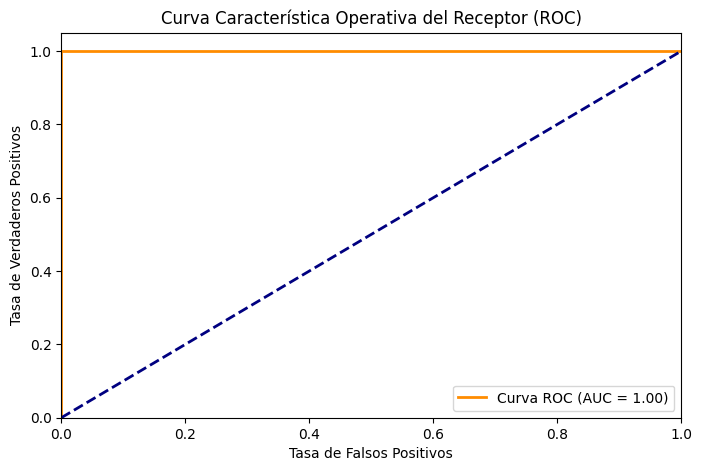


Puntuación AUC: 1.0000


In [260]:
# Evaluar el modelo
auc_score = evaluate_binary_classifier(lm, X_test, Y_test)
print(f"\nPuntuación AUC: {auc_score:.4f}")

El grafico muestra que la predicción de aciertos que tiene el modelo  demuestra una clasificación perfecta, esto quiere decir que el modelo es capaz de predecir a la perfección si un nuevo cliente es propenso a la fuja.

